In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import joblib
import os

In [91]:

# Load the dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
sales_data = pd.read_csv(url)

# Preview the first few rows of the dataset
print(sales_data.head())

                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633


In [92]:
# Convert 'date' column to datetime format
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Set 'date' column as index
sales_data.set_index('date', inplace=True)

# Display the first few rows to verify
print(sales_data.head())

                                sales
date                                 
2022-09-03 17:10:08.079328  55.292157
2022-09-04 17:10:08.079328  53.803211
2022-09-05 17:10:08.079328  58.141693
2022-09-06 17:10:08.079328  64.530899
2022-09-07 17:10:08.079328  66.013633


In [93]:
train = sales_data[:-10]
test = sales_data[-10:]  

In [94]:

# Fit the ARIMA model (you can experiment with the order parameters)
model = ARIMA(train['sales'], order=(1, 1, 1))  # Replace 'sales' with the actual name if different
model_fit = model.fit()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [95]:
# Forecast
forecast = model_fit.forecast(steps=len(test))
print("Forecasted values:")
print(forecast)

Forecasted values:
2023-08-25 17:10:08.079328    974.970313
2023-08-26 17:10:08.079328    977.531589
2023-08-27 17:10:08.079328    980.092865
2023-08-28 17:10:08.079328    982.654140
2023-08-29 17:10:08.079328    985.215414
2023-08-30 17:10:08.079328    987.776687
2023-08-31 17:10:08.079328    990.337958
2023-09-01 17:10:08.079328    992.899229
2023-09-02 17:10:08.079328    995.460499
2023-09-03 17:10:08.079328    998.021767
Freq: D, Name: predicted_mean, dtype: float64


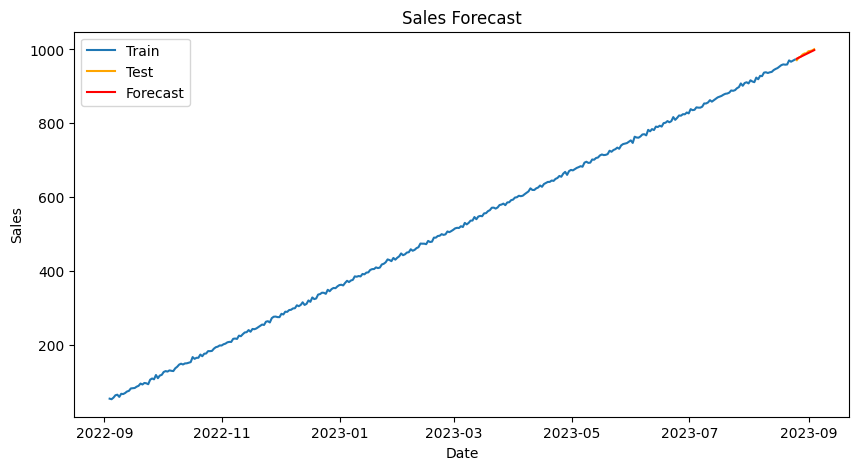

In [96]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [97]:
# Check the frequency of the time series
tensor = pd.infer_freq(sales_data.index)
print(f"Tensor of the time series: {tensor}")

Tensor of the time series: D


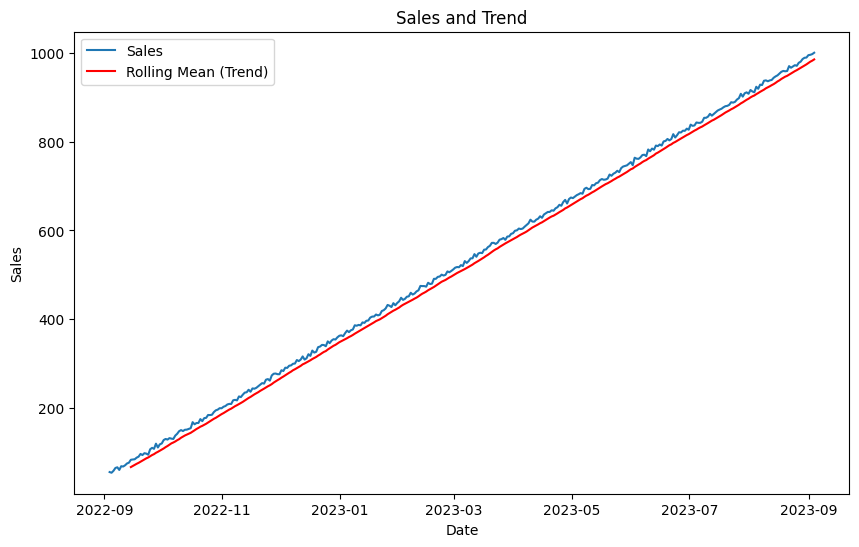

In [98]:
# Compute a rolling average with a window of 12 to capture yearly trend
sales_data['rolling_mean'] = sales_data['sales'].rolling(window=12).mean()

# Plot the rolling mean to observe the trend
plt.figure(figsize=(10, 6))
plt.plot(sales_data.index, sales_data['sales'], label='Sales')
plt.plot(sales_data.index, sales_data['rolling_mean'], color='red', label='Rolling Mean (Trend)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales and Trend')
plt.legend()
plt.show()

In [99]:
# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(sales_data['sales'].dropna())
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

ADF Statistic: 0.5454141937063742
p-value: 0.9861899815311063


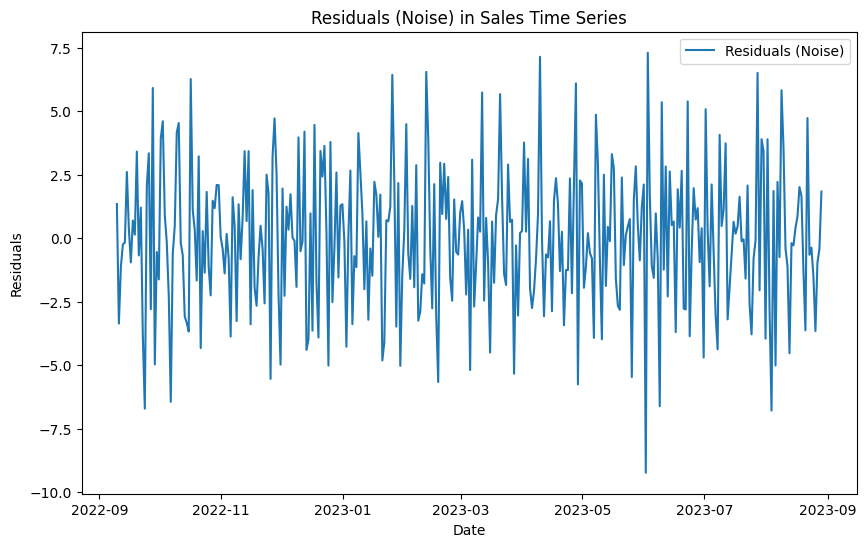

In [100]:
decomposition = seasonal_decompose(sales_data['sales'], model='additive', period=12)
residual = decomposition.resid

# Plot the residuals (noise)
plt.figure(figsize=(10, 6))
plt.plot(residual.index, residual, label='Residuals (Noise)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals (Noise) in Sales Time Series')
plt.legend()
plt.show()

In [101]:
# Split data into training and testing sets
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]

# Verify the shape of the split
print(f"Training set length: {len(train)}")
print(f"Testing set length: {len(test)}")

Training set length: 292
Testing set length: 74


In [102]:
# Use the best parameters from auto_arima to train the ARIMA model
best_p, best_d, best_q = model.order
arima_model = ARIMA(train['sales'], order=(best_p, best_d, best_q))
arima_result = arima_model.fit()

# Print the summary of the model
print(arima_result.summary())

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -838.546
Date:                Thu, 03 Oct 2024   AIC                           1683.092
Time:                        00:30:10   BIC                           1694.112
Sample:                    09-03-2022   HQIC                          1687.507
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1070.826      0.000       0.998       1.002
ma.L1         -0.9996      0.749     -1.334      0.182      -2.468       0.469
sigma2        18.3660     13.863      1.325      0.1

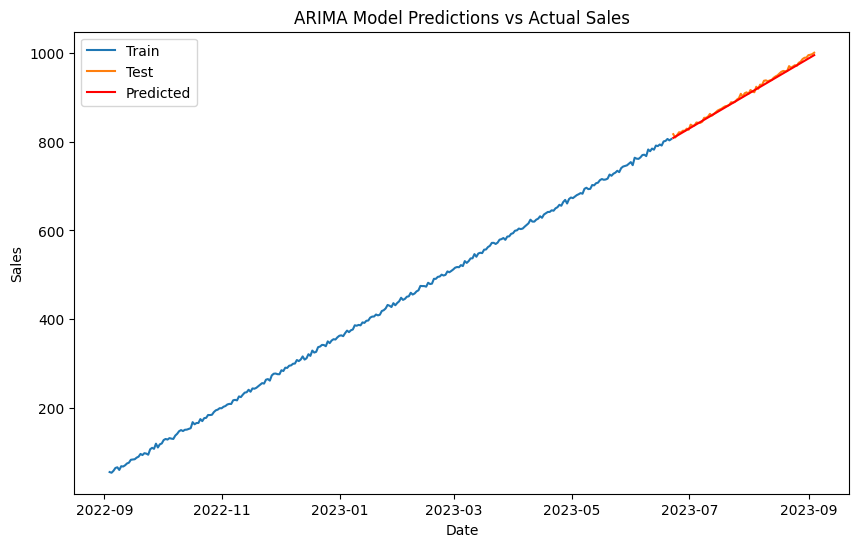

In [103]:
# Make predictions using the ARIMA model
predictions = arima_result.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Test')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('ARIMA Model Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [104]:
# Calculate MSE
mse = mean_squared_error(test['sales'], predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 16.492117306542024


In [105]:
# Forecast the test set data
predictions = arima_result.forecast(steps=len(test))

# Convert the predictions to a pandas DataFrame for easier comparison
pred_df = pd.DataFrame(predictions, index=test.index, columns=['Predicted'])
test['Predicted'] = pred_df['Predicted']

/tmp/ipykernel_9672/4289935733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted'] = pred_df['Predicted']


In [106]:
# Create the models directory if it doesn't exist
model_dir = './models'
os.makedirs(model_dir, exist_ok=True) 

In [107]:
joblib.dump(model_fit, f'{model_dir}/arima_model.pkl')  
print("ARIMA model saved successfully!")

ARIMA model saved successfully!


In [108]:
# Load the ARIMA model
loaded_arima_model = joblib.load('./models/arima_model.pkl')
